In [1]:
# library importation... 
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN 

In [2]:
# reading dataset
data = pd.read_csv('archive/jm1.csv')
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [3]:
# DATA EXPLORATION.. 

In [4]:
data.shape

(10885, 22)

In [5]:
data.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [7]:
for col in data.columns: 
    if data[col].dtype =='object': 
        print(f'column Name : {col}   type : {data[col].dtype}')
        unique = data[col].unique()
        print(unique)

column Name : uniq_Op   type : object
['1.2' '1' '17' '11' '14' '0' '4' '19' '32' '7' '26' '27' '21' '9' '28'
 '22' '16' '8' '20' '10' '13' '25' '12' '5' '34' '15' '6' '18' '24' '30'
 '?' '23' '3' '38' '29' '33' '39' '45' '31' '58' '37' '49' '48' '410' '35'
 '36' '42' '40' '46' '44' '41' '52' '74' '280' '65' '73' '61' '78' '172'
 '105' '102' '98' '411' '155' '2' '55' '43' '47' '99']
column Name : uniq_Opnd   type : object
['1.2' '1' '36' '135' '16' '24' '0' '5' '12' '23' '4' '64' '10' '47' '59'
 '56' '113' '25' '103' '29' '44' '21' '28' '7' '15' '57' '63' '53' '6'
 '76' '51' '30' '17' '8' '19' '18' '52' '32' '20' '40' '22' '86' '3' '78'
 '14' '11' '68' '38' '9' '13' '42' '67' '49' '?' '43' '34' '27' '33' '45'
 '26' '48' '46' '35' '87' '101' '104' '165' '126' '75' '112' '62' '77'
 '162' '31' '138' '80' '160' '58' '69' '60' '70' '2' '50' '71' '175' '39'
 '37' '54' '73' '65' '41' '66' '85' '95' '74' '94' '102' '88' '147' '117'
 '84' '55' '81' '132' '61' '140' '96' '90' '146' '806' '154' '

In [8]:
data.total_Op.dtype

dtype('O')

C:\Users\HP\AppData\Local\Temp\ipykernel_3264\315947474.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(), fmt='.2f', annot=True)


<Axes: >

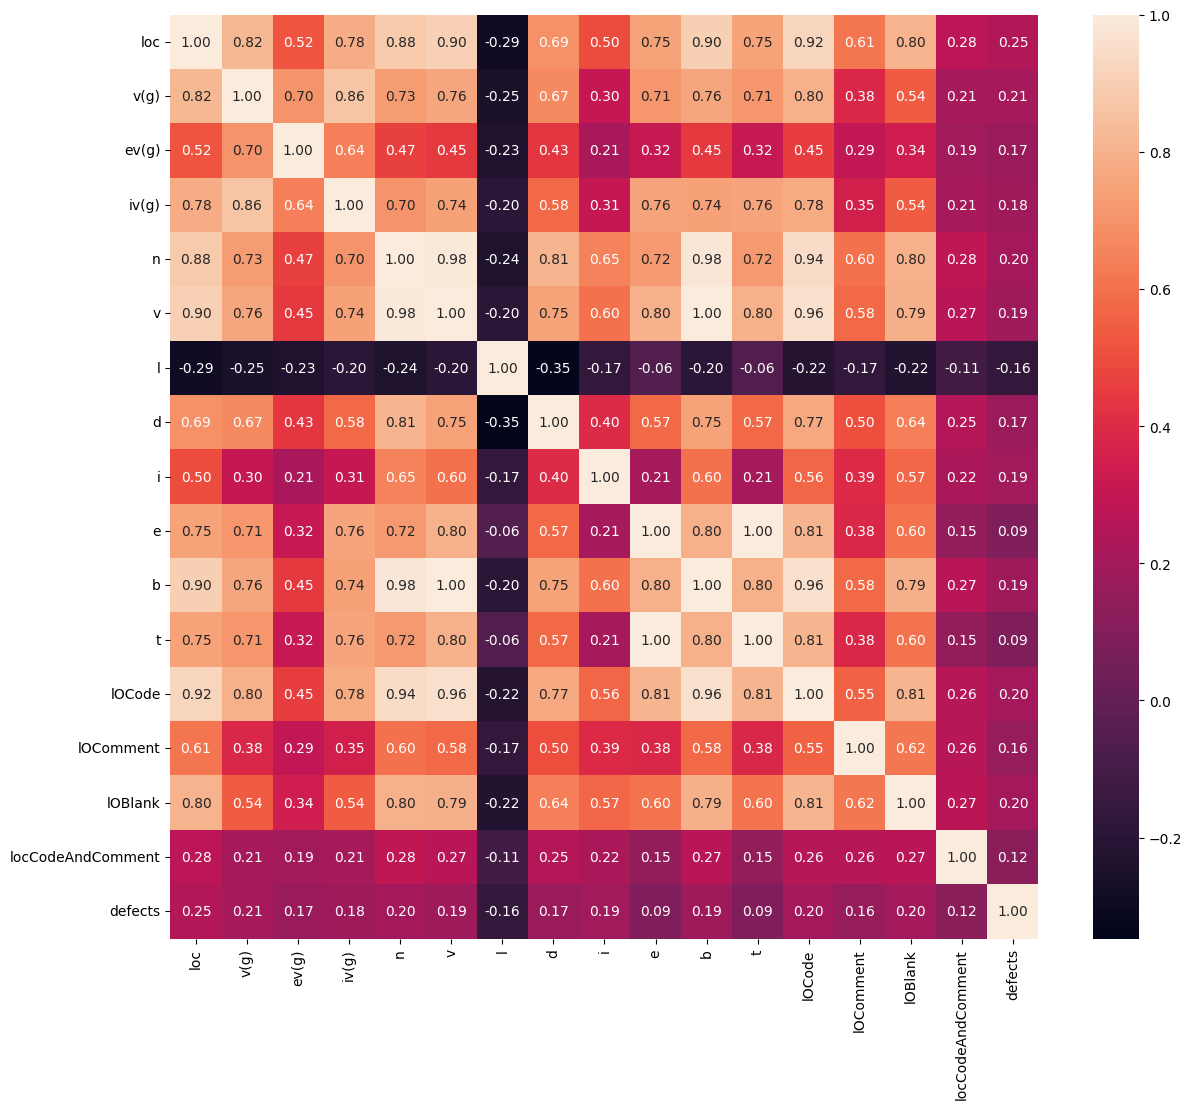

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sn.heatmap(data.corr(), fmt='.2f', annot=True)

In [10]:
# observation
#  THERE IS HIGH CORRELATION ON THIS ATTRIBUT.. 
# IOBlank with other attribut
# IOCode... 
# t as a very high correlatione expecially with e (100%)
# same with e attribut... 
# v attribute also shows high correlation as well
# n, iv(g), and ioc attribut also shows good correlation property... 

In [11]:
print(f' Total Number of Duplicate = {data.duplicated().sum()}')

 Total Number of Duplicate = 1973


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [13]:
extracted_col = data.columns[:16]
extracted_col

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment'],
      dtype='object')

In [14]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


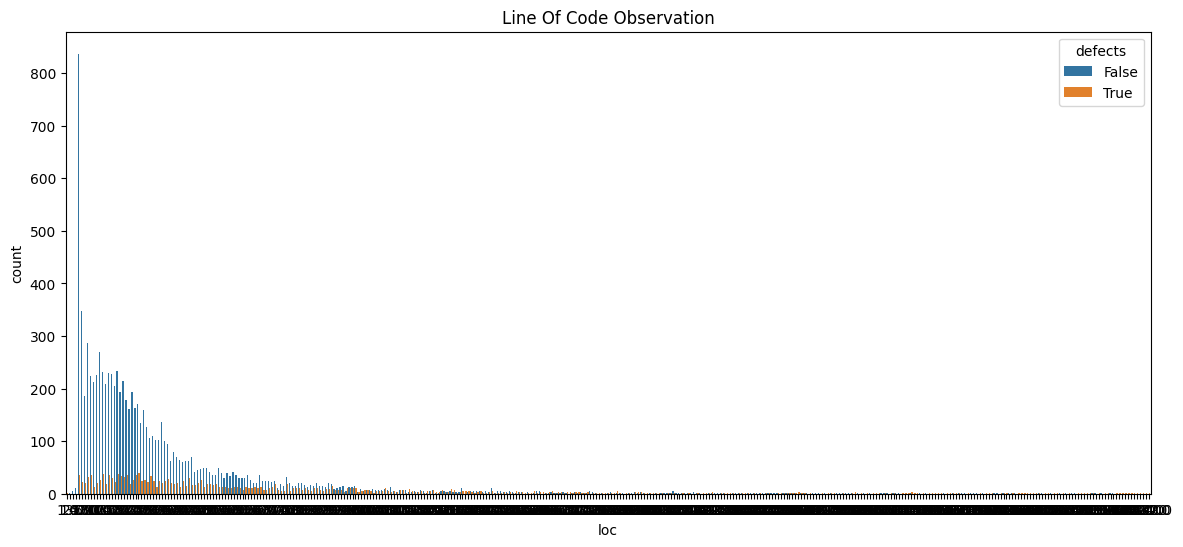

In [15]:
plt.figure(figsize=(14,6))
plt.style = 'darkgrid'
# data['defects'].value_counts()
sn.countplot(data=data, x='loc', hue='defects')
plt.title('Line Of Code Observation')
plt.show()
# plt.xticks(orientation=45)

<Figure size 600x200 with 0 Axes>

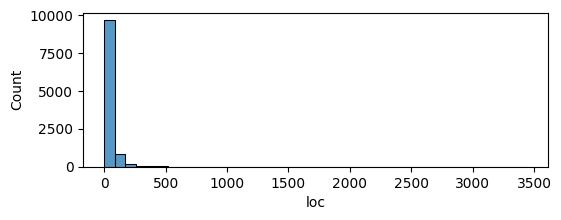

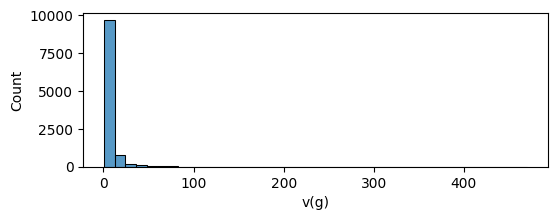

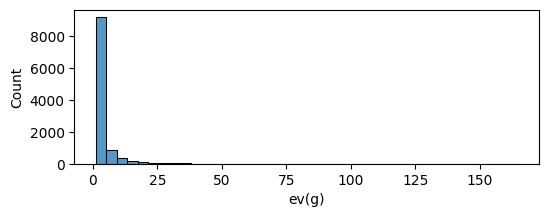

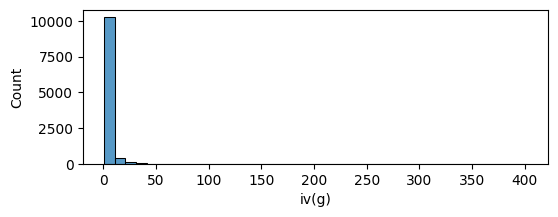

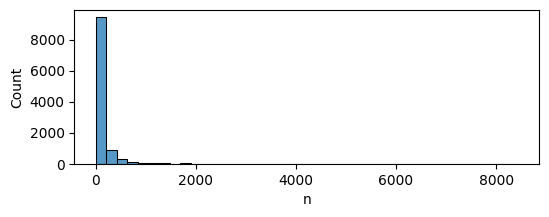

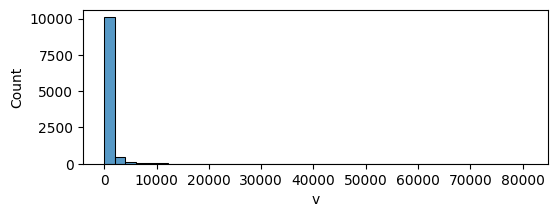

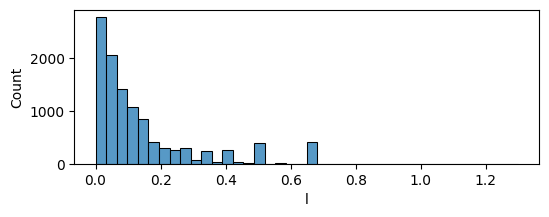

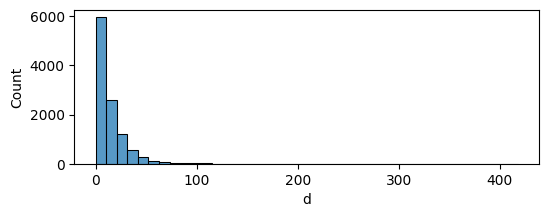

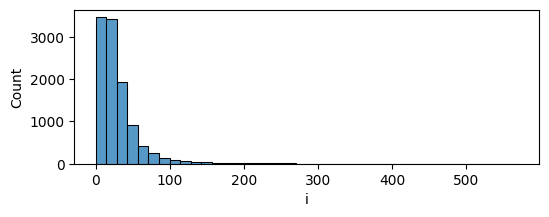

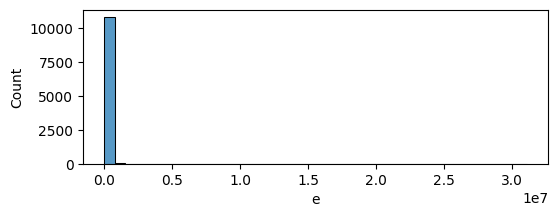

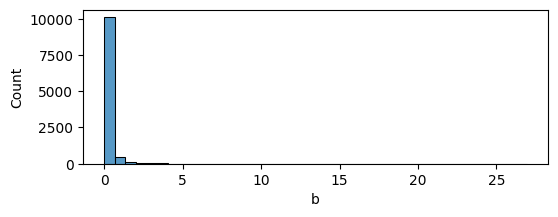

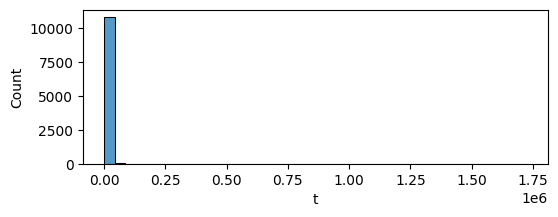

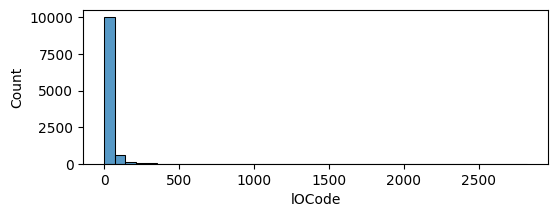

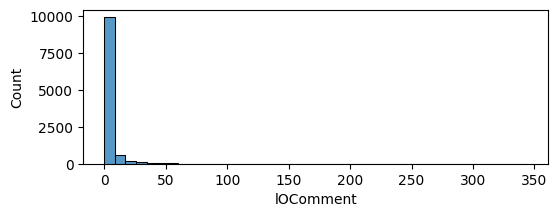

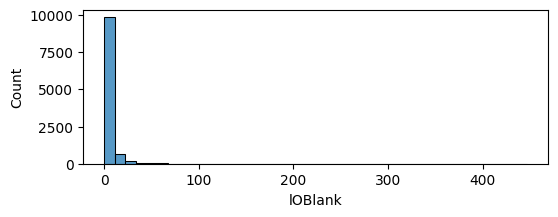

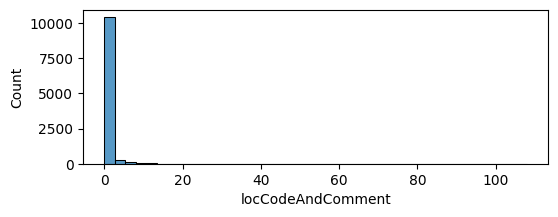

In [16]:
plt.figure(figsize=(6,2))
for col in data.columns[:16]: 
    plt.figure(figsize=(6,2))
    sn.histplot(data=data, x=data[col], bins=40)
    plt.show()

In [17]:
# checking for null value..... 
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

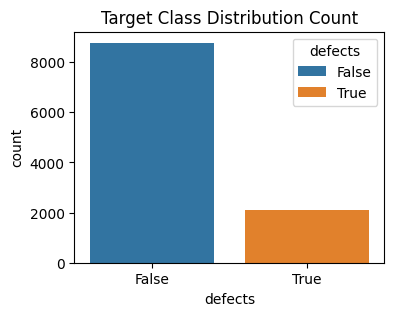

In [18]:
plt.figure(figsize=(4,3))
sn.countplot(data=data , x='defects', hue='defects', dodge=False)
# plt.grid()
plt.title('Target Class Distribution Count')
plt.show()

In [19]:
row, col = data.shape
print(f'Row Count : {row}       Row Count : {col}')

Row Count : 10885       Row Count : 22


In [20]:
# ------------------  General Observation -------------------------
# 1) some columns as large data distribution 
# 2) present of large amount of duplications in the dataset sample 
# 3) absent of null empty value in the dataset sample values...
# 4) the dataset is highly imbalance.... 

In [21]:
# PREPROCESSING THE DATASET.....

In [22]:
# removing data duplication (keep the first)
clean_data = data.drop_duplicates(keep='first')
print('Duplication Removed..... ')

row, col = clean_data.shape
print(f'Row Count : {row}       Row Count : {col}')

Duplication Removed..... 
Row Count : 8912       Row Count : 22


In [23]:
clean_data.head(2)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,True


In [24]:
# coverting object type to float
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                8912 non-null   float64
 1   v(g)               8912 non-null   float64
 2   ev(g)              8912 non-null   float64
 3   iv(g)              8912 non-null   float64
 4   n                  8912 non-null   float64
 5   v                  8912 non-null   float64
 6   l                  8912 non-null   float64
 7   d                  8912 non-null   float64
 8   i                  8912 non-null   float64
 9   e                  8912 non-null   float64
 10  b                  8912 non-null   float64
 11  t                  8912 non-null   float64
 12  lOCode             8912 non-null   int64  
 13  lOComment          8912 non-null   int64  
 14  lOBlank            8912 non-null   int64  
 15  locCodeAndComment  8912 non-null   int64  
 16  uniq_Op            8912

In [25]:
[pd.to_numeric(clean_data[col], errors='coerce') for col in clean_data.columns if data[col].dtype == 'object']
for col in clean_data.columns: 
    if clean_data[col].dtype == 'object' :
        clean_data[col] = pd.to_numeric(clean_data[col], errors='coerce')

clean_data.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_3264\973672311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[col] = pd.to_numeric(clean_data[col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                8912 non-null   float64
 1   v(g)               8912 non-null   float64
 2   ev(g)              8912 non-null   float64
 3   iv(g)              8912 non-null   float64
 4   n                  8912 non-null   float64
 5   v                  8912 non-null   float64
 6   l                  8912 non-null   float64
 7   d                  8912 non-null   float64
 8   i                  8912 non-null   float64
 9   e                  8912 non-null   float64
 10  b                  8912 non-null   float64
 11  t                  8912 non-null   float64
 12  lOCode             8912 non-null   int64  
 13  lOComment          8912 non-null   int64  
 14  lOBlank            8912 non-null   int64  
 15  locCodeAndComment  8912 non-null   int64  
 16  uniq_Op            8907

In [26]:
clean_data.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [27]:
import numpy as np

clean_data.replace(np.nan, method='ffill', inplace=True)
clean_data.isna().sum().sum()

0

<Axes: >

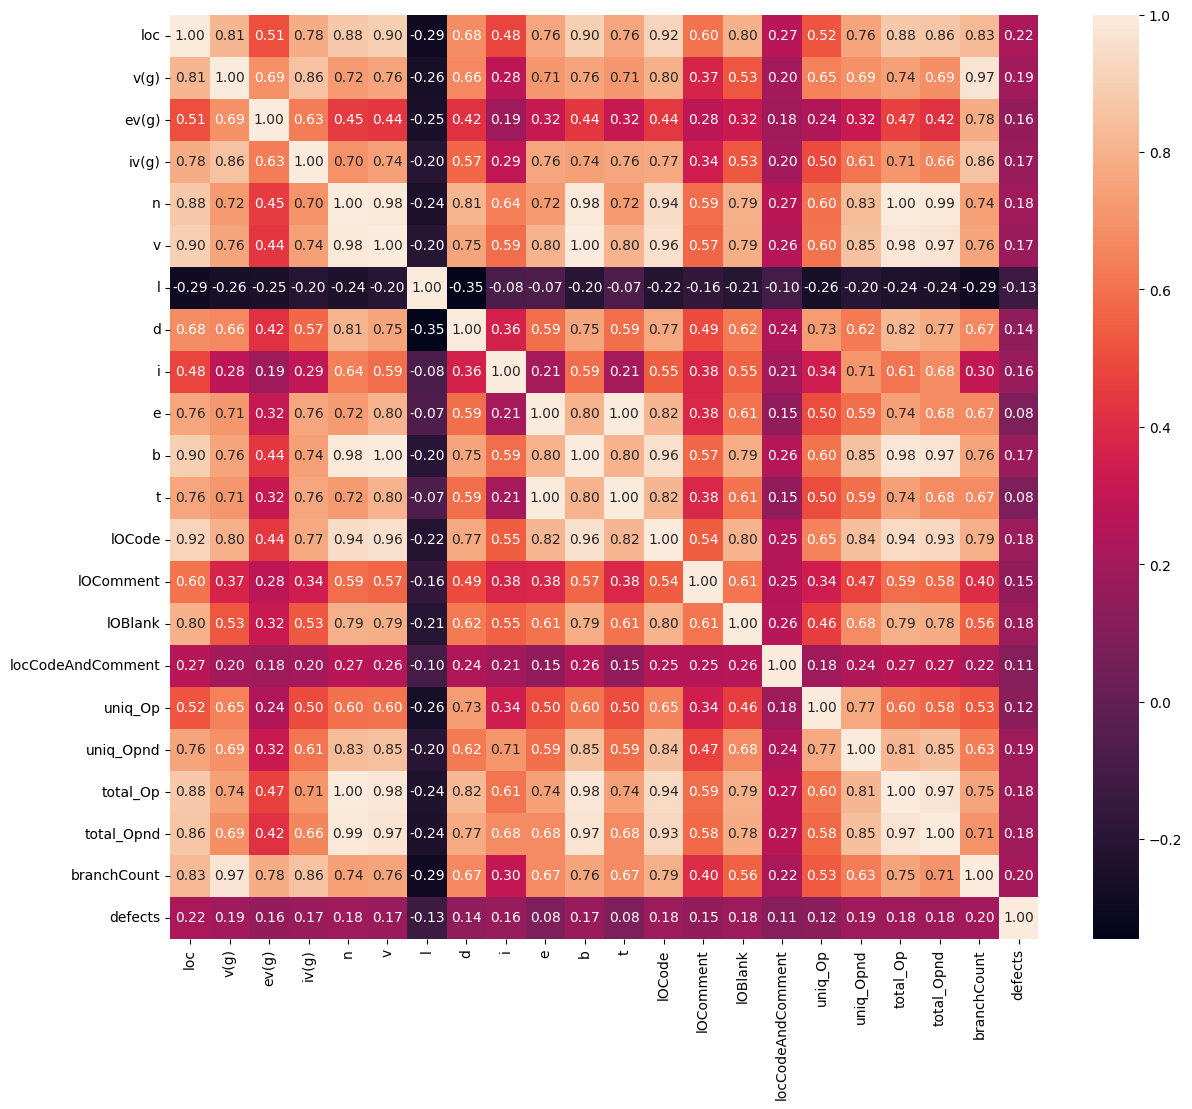

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sn.heatmap(clean_data.corr(), fmt='.2f', annot=True)

In [29]:
#  other observation 
#  high level of correlation with other columns by 
#  total_op, total_Opnd, branchCount

In [30]:
# split data into dependent and independent.. 
X, y = clean_data.drop(columns=['defects']) , clean_data.defects
y.shape

(8912,)

In [31]:
y

0        False
1         True
2         True
3         True
4         True
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name: defects, Length: 8912, dtype: bool

In [32]:
y_cat = y.astype('category')
y_cat.info()

<class 'pandas.core.series.Series'>
Int64Index: 8912 entries, 0 to 10884
Series name: defects
Non-Null Count  Dtype   
--------------  -----   
8912 non-null   category
dtypes: category(1)
memory usage: 78.4 KB


In [33]:
y_cat.unique()

[False, True]
Categories (2, bool): [False, True]

In [34]:
y_enc = y_cat.cat.codes
lbl_converter = dict(zip(y_cat.unique(), y_cat.cat.codes))
lbl_converter

{False: 0, True: 1}

In [35]:
y_enc.value_counts()

0    6905
1    2007
dtype: int64

In [36]:
# label encoding
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
y_encode

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
# data balacing using smote-enn 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN 

# smote data balancing 
smote_enn = SMOTEENN(sampling_strategy='auto')
X_resampled , y_resampled  = smote_enn.fit_resample(X, y_enc)
smote_enn

SMOTEENN()

In [38]:
# adasyn data balancing
adysn_enn = ADASYN(sampling_strategy='auto')
X_resampled2 , y_resampled2  = adysn_enn.fit_resample(X, y_enc)
adysn_enn

ADASYN()

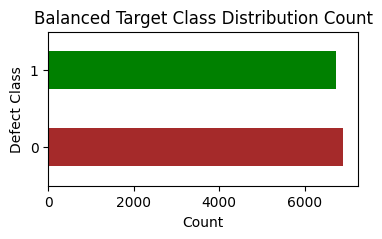

In [39]:
plt.figure(figsize=(4,2))
y_resampled2.value_counts().plot(kind='barh', color=['brown', 'g'])
plt.title('Balanced Target Class Distribution Count')
plt.xlabel('Count')
plt.ylabel('Defect Class')
plt.show()

In [40]:
X_resampled

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,177.000000,25.000000,21.000000,13.000000,446.000000,2811.490000,0.020000,44.210000,63.590000,124304.140000,...,6905.790000,101,47,22,5,25.000000,54.000000,255.000000,191.000000,48.000000
1,23.000000,12.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,23.000000
2,159.000000,26.000000,1.000000,20.000000,485.000000,2942.050000,0.020000,42.240000,69.640000,124286.740000,...,6904.820000,139,13,3,2,18.000000,49.000000,255.000000,230.000000,51.000000
3,26.000000,3.000000,1.000000,2.000000,80.000000,388.640000,0.060000,17.230000,22.550000,6696.540000,...,372.030000,18,4,2,0,16.000000,13.000000,52.000000,28.000000,5.000000
4,64.000000,6.000000,1.000000,6.000000,212.000000,1029.890000,0.020000,47.680000,21.600000,49103.780000,...,2727.990000,43,8,8,0,15.000000,14.000000,123.000000,89.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,24.159294,5.000000,3.159294,2.840706,71.725646,358.153533,0.078407,13.068765,27.513703,4671.740823,...,259.545134,18,0,3,0,15.477883,16.362823,44.000000,27.725646,9.000000
6737,114.316570,14.485890,3.607362,10.392638,302.974223,1732.223367,0.028785,34.919106,51.504401,59161.270485,...,3286.735079,71,14,23,2,20.242945,32.056440,195.253980,107.720243,27.971780
6738,46.376095,8.317560,3.000000,5.211707,166.729759,997.618955,0.050000,18.734409,53.354417,18672.327652,...,1037.348994,34,4,3,0,23.000000,40.259026,101.259026,65.470733,15.423414
6739,90.755341,10.138017,1.690087,3.552069,214.656208,1343.547100,0.030000,35.008406,38.388708,47026.515128,...,2612.584250,78,0,4,3,34.619827,42.791723,128.484312,86.171896,15.828104


In [41]:
# # Reduced dimention
# mini_data = X_resampled[['lOBlank', 'lOCode', 'n', 'loc', 'total_Op', 'total_Opnd' ]]
# mini_data.head(2)

In [42]:
# data spliting using the ADSYN data resample
xtrain_2, xtest_2, ytrain_2, ytest_2 = model_selection.train_test_split(X_resampled2, y_resampled2,test_size=0.2, stratify=y_resampled2, random_state=42)
print(xtrain_2.shape)
print(ytrain_2.shape)

(10908, 21)
(10908,)


In [43]:
# DATA SPLITTING 

In [44]:
# data spliting using the SMOTE-ENN data resample
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_resampled, y_resampled,test_size=0.2, stratify=y_resampled, random_state=42)
print(xtrain.shape)
print(ytrain.shape)

(5392, 21)
(5392,)


In [45]:
print(xtest.shape)
print(ytest.shape)

(1349, 21)
(1349,)


In [46]:
ytrain.value_counts()

1    3127
0    2265
dtype: int64

In [47]:
# MACHINE LEARNING TRAINING AND DEVELOPEMENT.. 

In [48]:
# five machine learning should be considered....
#  the ML include 
#  RBM, GB, ADABOOST, RF, SVM
# afterward a dimentionality reduction will be considered

In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,  recall_score, f1_score

In [50]:
# DEFINING AND INITIALIZING THE MODEL

In [51]:
rf = RandomForestClassifier() #random forest
ad = AdaBoostClassifier() # the adaboost classifier
gb = GradientBoostingClassifier() # the gradient boos classifier 

In [55]:
def model_training_evaluation(model, xtrain, ytrain, xtest, ytest):
    model_name = str(model).split('(')[0]

    # train process
    model.fit(xtrain, ytrain)
    train_score = model.score(xtrain, ytrain)

    # prediction
    prediction = model.predict(xtest)

    # evaluation
    acc = accuracy_score(ytest, prediction)
    pre = precision_score(ytest, prediction)
    rec = recall_score(ytest, prediction)
    f1 = f1_score(ytest, prediction)
    cof_matrix = confusion_matrix(ytest, prediction)


    # construct a dict to hold data 
    results_data = {
        'model_name': model_name,
        'train_score': train_score, 
        'acc_score': acc, 
        'pre_score': pre, 
        'rec_score': rec, 
        'f1_score': f1
    }

    advance_result = {
        'cof_matrix': cof_matrix, 
        'class_report': classification_report(prediction, ytest)
    }

    # final construction of result
    final_results = {'metric':results_data, 'report':advance_result}
    
    return final_results


In [53]:
# RANDOM FOREST

model_name     RandomForestClassifier
train_score                       1.0
acc_score                    0.918458
pre_score                    0.924242
rec_score                    0.936061
f1_score                     0.930114
dtype: object
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       557
           1       0.94      0.92      0.93       792

    accuracy                           0.92      1349
   macro avg       0.92      0.92      0.92      1349
weighted avg       0.92      0.92      0.92      1349



<Axes: >

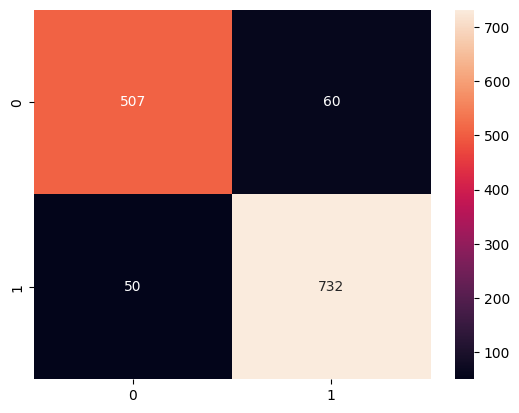

In [56]:
# RANDOM FOREST TRAINNIG USING SMOTEENN DATA BALACING
rf_result = model_training_evaluation(rf, xtrain, ytrain, xtest, ytest)    
print(pd.Series(rf_result['metric']))
print(rf_result['report']['class_report'])
sn.heatmap(rf_result['report']['cof_matrix'], fmt='d', annot=True)

model_name     RandomForestClassifier
train_score                  0.995325
acc_score                    0.845308
pre_score                    0.857143
rec_score                    0.824053
f1_score                     0.840273
dtype: object
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1433
           1       0.82      0.86      0.84      1295

    accuracy                           0.85      2728
   macro avg       0.85      0.85      0.85      2728
weighted avg       0.85      0.85      0.85      2728



<Axes: >

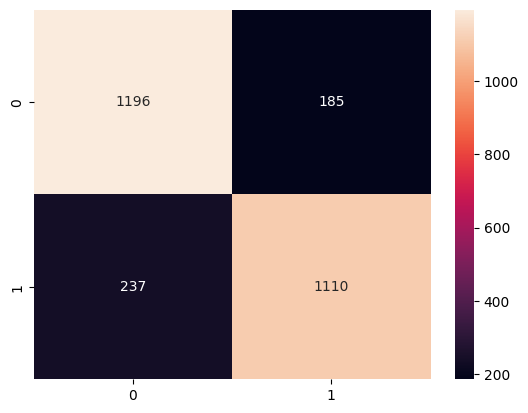

In [ ]:
# RANDOM FOREST TRAINNIG USING ADSYN DATA BALACING

rf_result_2 = model_training_evaluation(rf, xtrain_2, ytrain_2, xtest_2, ytest_2)    
print(pd.Series(rf_result_2['metric']))
print(rf_result_2['report']['class_report'])
sn.heatmap(rf_result_2['report']['cof_matrix'], fmt='d', annot=True)

In [ ]:
# ADA BOOST ALGORITHM

model_name     AdaBoostClassifier
train_score              0.832159
acc_score                0.840623
pre_score                0.865806
rec_score                0.858056
f1_score                 0.861914
dtype: object
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       574
           1       0.86      0.87      0.86       775

    accuracy                           0.84      1349
   macro avg       0.84      0.84      0.84      1349
weighted avg       0.84      0.84      0.84      1349



<Axes: >

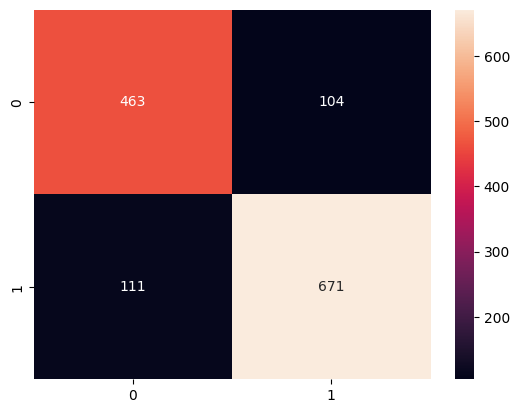

In [57]:
# ADA BOOST TRAINNIG USING SMOTEENN DATA BALACING
ad_result = model_training_evaluation(ad, xtrain, ytrain, xtest, ytest)    
print(pd.Series(ad_result['metric']))
print(ad_result['report']['class_report'])
sn.heatmap(ad_result['report']['cof_matrix'], fmt='d', annot=True)

model_name     RandomForestClassifier
train_score                   0.74945
acc_score                    0.752933
pre_score                    0.779717
rec_score                    0.696362
f1_score                     0.735686
dtype: object
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1525
           1       0.70      0.78      0.74      1203

    accuracy                           0.75      2728
   macro avg       0.75      0.76      0.75      2728
weighted avg       0.76      0.75      0.75      2728



<Axes: >

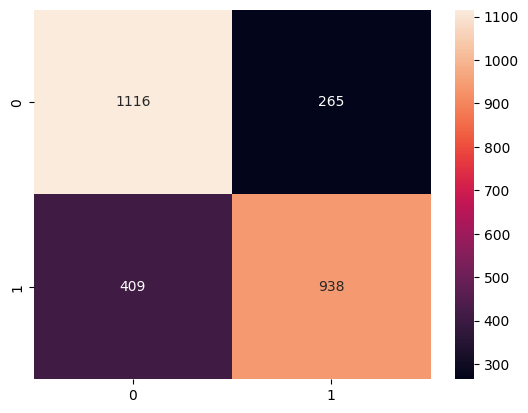

In [ ]:
# ADA BOOST TRAINNIG USING ADSYN DATA BALACING
ad_result_2 = model_training_evaluation(ad, xtrain_2, ytrain_2, xtest_2, ytest_2)    
print(pd.Series(ad_result_2['metric']))
print(ad_result_2['report']['class_report'])
sn.heatmap(ad_result_2['report']['cof_matrix'], fmt='d', annot=True)

In [ ]:
# GRADIENT BOOST ALGORITH

model_name     RandomForestClassifier
train_score                  0.879163
acc_score                    0.859209
pre_score                     0.88664
rec_score                    0.866755
f1_score                     0.876584
dtype: object
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       573
           1       0.87      0.89      0.88       741

    accuracy                           0.86      1314
   macro avg       0.86      0.86      0.86      1314
weighted avg       0.86      0.86      0.86      1314



<Axes: >

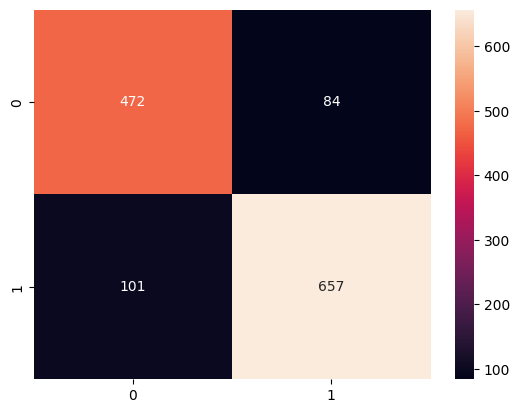

In [ ]:
# GRADIENT BOOST TRAINNIG USING SMOTEENN DATA BALACING
gb_result = model_training_evaluation(gb, xtrain, ytrain, xtest, ytest)    
print(pd.Series(gb_result['metric']))
print(gb_result['report']['class_report'])
sn.heatmap(gb_result['report']['cof_matrix'], fmt='d', annot=True)

model_name     RandomForestClassifier
train_score                  0.815823
acc_score                    0.805352
pre_score                    0.875691
rec_score                    0.706013
f1_score                     0.781751
dtype: object
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1642
           1       0.71      0.88      0.78      1086

    accuracy                           0.81      2728
   macro avg       0.80      0.82      0.80      2728
weighted avg       0.82      0.81      0.81      2728



<Axes: >

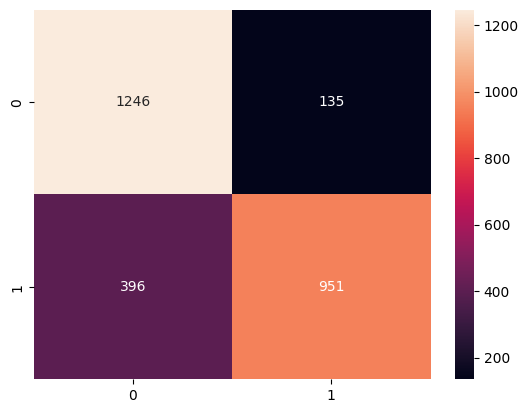

In [ ]:
# GRADIENT BOOST TRAINNIG USING ADSYN DATA BALACING
gb_result_2 = model_training_evaluation(gb, xtrain_2, ytrain_2, xtest_2, ytest_2)    
print(pd.Series(gb_result_2['metric']))
print(gb_result_2['report']['class_report'])
sn.heatmap(gb_result_2['report']['cof_matrix'], fmt='d', annot=True)

In [ ]:
# SAVING THE RANDOM MODEL FOR APP DEVELOPMENT, BECUASE THE BEST ACCURACY IS ACHIEVED WITH RANDOM FOREST...
import joblib
joblib.dump(rf, 'software_testing_model.jb')

['software_testing_model.jb']

<h1 style=" text:'align-center' color:'red' ">END OF CODE </h1>